In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [44]:
dataset = pd.read_csv("../Datasets/Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [45]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

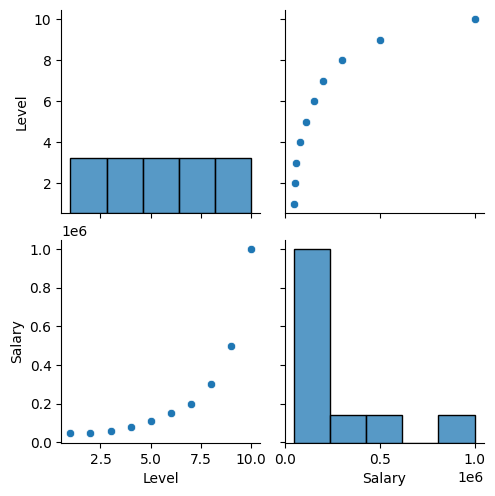

In [46]:
sns.pairplot(dataset)

In [47]:
dataset.iloc[:,1:].corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


Primero probamos con un modelo de regresión lineal simple

In [48]:
simpleLinearRegression = LinearRegression().fit(X, y)
y_pred = simpleLinearRegression.predict(X)

In [49]:
dataset.Salary.std()

299373.88366760087

In [50]:
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
print("MSA:", mean_absolute_error(y, y_pred))
print("R2:", r2_score(y, y_pred))

RMSE: 163388.73519272613
MSA: 128454.54545454546
R2: 0.6690412331929895


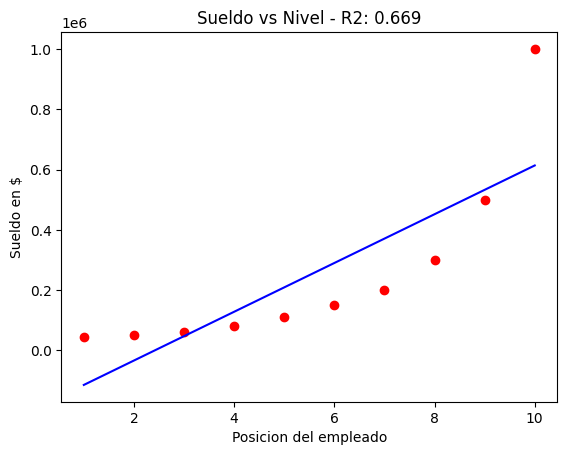

In [51]:
plt.scatter(X, y, color = "red")
plt.plot(X, y_pred, color = "blue")
plt.title("Sueldo vs Nivel - R2: {}".format(round(r2_score(y, y_pred),3)))
plt.xlabel("Posicion del empleado")
plt.ylabel("Sueldo en $")
plt.show()

Usamos un modelo de regresión logística

In [52]:
x_poly = PolynomialFeatures(4).fit_transform(X)

In [53]:
polynomialLinealRegression = LinearRegression().fit(x_poly, y)
y_pred_poly = polynomialLinealRegression.predict(x_poly)

In [54]:
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred_poly)))
print("MSA:", mean_absolute_error(y, y_pred_poly))
print("R2:", r2_score(y, y_pred_poly))

RMSE: 14503.234909626777
MSA: 12681.818181828514
R2: 0.9973922891706614


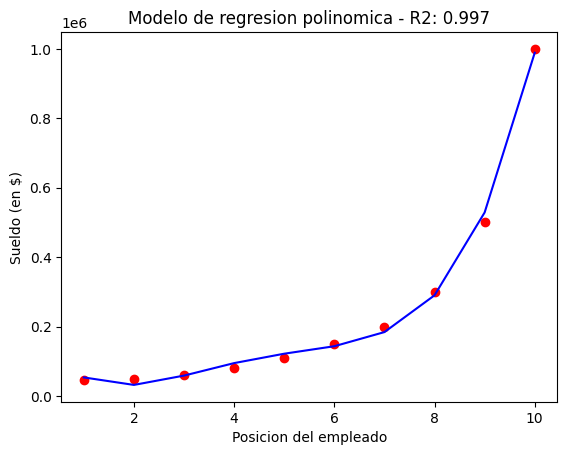

In [55]:
xlabel = "Posicion del empleado"
ylabel = "Sueldo (en $)"
plt.scatter(X, y, color = "red")
plt.plot(X, polynomialLinealRegression.predict(x_poly), color = "blue")
plt.title("Modelo de regresion polinomica - R2: {}".format(round(r2_score(y, y_pred_poly),3)))
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()